### GloFAS data sample
from Ervin Zsoter <jira@ecmwf.int>:
>I have put the netcdf converted glofas forecast files, which include the 3 thresholds as well, and also the list of static reporting points (that are there every day in glofas regardless of the flood conditions in the model), the dynamic reporting points (which only identified if floods are in the model), and also the flood extent map (band 1 is the depth and band 2 is the extent max) that we have in glofas as a new product and finally the corresponding day of the maximum discharge, as the rapid flood risk is currently based on the worst flood in the 30-day period, so this value can help refining the period when the flood happens in the model.
The data is for 1 July 2019 as an example. Please let me know how can you use them.
Alternatively please also think about the option of the web map service option (WMST; https://www.globalfloods.eu/general-information/data-and-services/) that glofas provides, that might also be useful.



In [109]:
!ls GloFAS\ data

ls: GloFAS data: No such file or directory


In [110]:
# import module
from datetime import date
import requests, wget
import os, sys,json,csv
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from shapely.geometry import Point

In [128]:
plt.rcParams["figure.figsize"] = (12,5.5)
plt.rcParams.update({'font.size': 16})

In [112]:
# change working directory
%cd GloFAS\ data

[Errno 2] No such file or directory: 'GloFAS data'
/Users/JunWang/Projects/ModelOfModels/data/GloFAS data


### Reporting Points   
* Static reporting points (that are there every day in glofas regardless of the flood conditions in the model)

* Dynamic reporting points (which only identified if floods are in the model)  

In [113]:
# static reporting points
df = pd.read_csv('threspoints.txt',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,2903430,Lena,Lena,Stolb,Russian Federation,Asia,RU,2460000,0,126.75,72.25,-,0,1,0.0000,0.0000,0.0000,0
1,2,2999910,Olenek,Olenek,7 5Km D S Of Mouth Of River Pur,Russian Federation,Asia,RU,198000,0,123.35,72.15,-,0,1,0.0000,0.0000,0.0000,0
2,3,2999850,Khatanga,Khatanga,Khatanga,Russian Federation,Asia,RU,275000,0,102.15,71.95,-,0,1,0.0000,0.0000,0.0000,0
3,4,2999150,Anabar,Anabar,Saskylakh,Russian Federation,Asia,RU,78800,0,114.05,71.95,-,0,1,0.0000,0.0000,0.0000,0
4,5,2903420,Lena,Lena,Kyusyur Kusur,Russian Federation,Asia,RU,2430000,0,127.55,70.85,-,1,30,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2321,5868050,Clutha,Clutha,Clyde,New Zealand,Australia_Oceania,NZ,12018,0,169.35,-45.25,-,2,3,0.0000,0.0000,0.0000,0
2321,2322,11342001,Aisen,Aisen,En Puerto Aysen,Chile,South_America,CL,-9999,0,-72.65,-45.45,-,2,16,0.0196,0.0196,0.0196,0
2322,2323,5868100,Clutha,Clutha,Balclutha,New Zealand,Australia_Oceania,NZ,20582,0,169.75,-46.35,-,2,5,0.0000,0.0000,0.0000,0
2323,2324,11542001,Rio Baker,Rio Baker,En Colonia,Chile,South_America,CL,-9999,0,-72.85,-47.35,-,0,1,0.0000,0.0000,0.0000,0


In [114]:
# dynamic report points
dfdyn = pd.read_csv('threspointsDyn.txt',header = None)
dfdyn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2326,1,Dynamic Point,-,-,-,-,-,-,2941.0,-81.15,82.65,-,3,12,0.392,0.216,0.1370,1
1,2327,2,Dynamic Point,-,-,-,-,-,-,2058.0,-84.55,81.85,-,3,12,0.275,0.255,0.1960,2
2,2328,3,Dynamic Point,-,-,-,-,-,-,4548.0,-34.05,81.45,-,3,13,0.275,0.216,0.1570,1
3,2329,4,Dynamic Point,-,-,-,-,-,-,1651.0,-82.35,81.15,-,3,27,0.706,0.431,0.2350,2
4,2330,5,Dynamic Point,-,-,-,-,-,-,4349.0,-60.45,81.05,-,3,3,1.000,0.471,0.0784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2559,234,Dynamic Point,-,-,-,-,-,-,101758.0,-72.75,-3.35,-,2,9,1.000,1.000,1.0000,3
234,2560,235,Dynamic Point,-,-,-,-,-,-,269893.0,-64.55,-3.35,-,1,16,1.000,1.000,0.0000,2
235,2561,236,Dynamic Point,-,-,-,-,-,-,26730.0,-77.85,-3.45,-,2,9,0.451,0.216,0.0392,1
236,2562,237,Dynamic Point,-,-,-,-,-,-,22077.0,-74.85,-3.45,-,1,2,1.000,1.000,0.0196,2


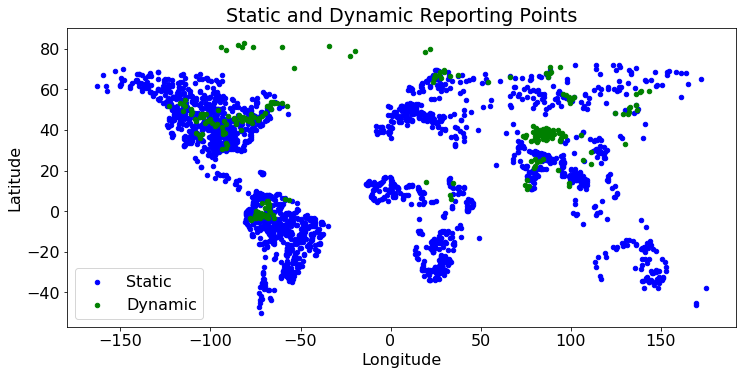

In [129]:
ax1 = df.plot.scatter(x=10,y=11,c='Blue',label='Static')
dfdyn.plot.scatter(x=10,y=11,c='Green',ax=ax1, label="Dynamic")
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
ax1.set_title('Static and Dynamic Reporting Points')
ax1.legend()
plt.show()

 ### GLoFAS forecast files (NetCDF)
 Refercence: GloFAS 30-day https://www.globalfloods.eu/technical-information/glofas-30day/   
 GloFAS 30-day data is a gridded dataset at 0.1° horizontal resolution. It contains:   
- 51-member ensemble real-time daily discharge forecasts for 30 days (GloFAS 30-day).
- A proxy-observation deterministic daily discharge simulation, based on the latest ECMWF reanalysis (GloFAS 30-day discharge time series from GloFAS 30-day hydrological reanalysis).  
- Ensemble daily discharge forecast reruns; the frequency (daily/twice weekly Monday and Thursday) and ensemble size depends on the forecast reruns period (GloFAS 30-day forecast reruns).   
- A set of deterministic flood thresholds corresponding to the 2-, 5- and 20-year return period discharge levels (GloFAS 30-day discharge thresholds).   

In [116]:
from netCDF4 import Dataset as NetCDFFile 
# exploer NetCDF file
nc_file = 'glofas2.1_reforecast_ref2018_glofas2.1_era5wb_dis_bigchannels_1000km2_2019070100_0.nc'
nc = NetCDFFile(nc_file)

In [117]:
print(nc.variables)

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    _FillValue: 1e+20
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (3600,)
filling on), ('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    _FillValue: 1e+20
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (1500,)
filling on), ('ensemble', <class 'netCDF4._netCDF4.Variable'>
int16 ensemble(ensemble)
    long_name: ensemble member
unlimited dimensions: 
current shape = (51,)
filling on, default _FillValue of -32767 used
), ('ups', <class 'netCDF4._netCDF4.Variable'>
float32 ups(lat, lon)
    _FillValue: 1e+20
    units: km2
    long_name: upstream area
unlimited dimensions: 
current shape = (1500, 3600)
filling on), ('ldd', <class 'netCDF4._netCDF4.Variable'>
float32 ldd(lat, lon)
    _FillValue: 1e+20
    long_name: local drain direction (1-9)
unlimited dimensions: 
current shape = (1500, 3600)
filling on), ('rl2', <cl

In [118]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
rl2 = nc.variables['rl2'][:]
dis = nc.variables['dis'][:]
dis_ensemble0 = dis[0,0,:,:]

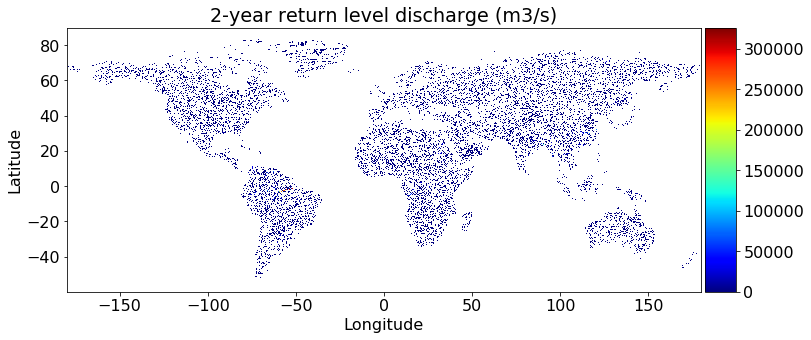

In [130]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure()
ax = plt.gca()
im=ax.imshow(rl2,cmap="jet",vmin=0,vmax=rl2.max(),extent=[lon.min(),lon.max(),lat.min(),lat.max()])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('2-year return level discharge (m3/s)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

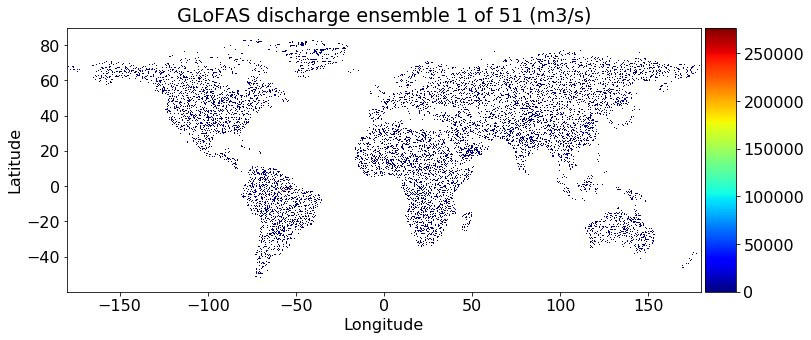

In [131]:
plt.figure()
ax = plt.gca()
im=ax.imshow(dis_ensemble0,cmap="jet",vmin=0,vmax=dis_ensemble0.max(),extent=[lon.min(),lon.max(),lat.min(),lat.max()])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('GLoFAS discharge ensemble 1 of 51 (m3/s)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

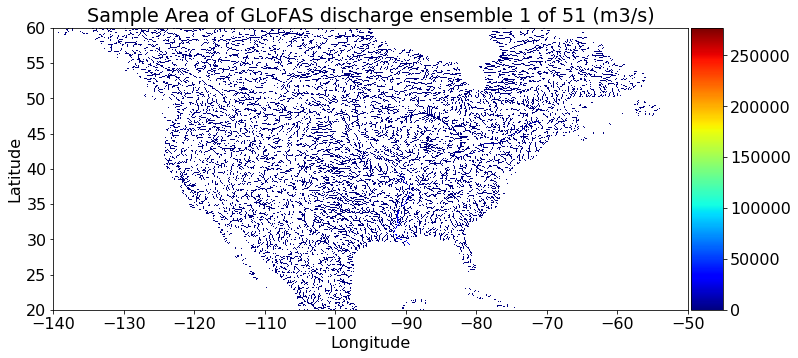

In [133]:
plt.figure()
ax = plt.gca()
im=ax.imshow(dis_ensemble0,cmap="jet",vmin=0,vmax=dis_ensemble0.max(),extent=[lon.min(),lon.max(),lat.min(),lat.max()])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Sample Area of GLoFAS discharge ensemble 1 of 51 (m3/s)')
ax.set_xlim(-140,-50)
ax.set_ylim(20,60)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()